In [24]:
import numpy as np
import pandas as pd
import os


In [25]:
df=pd.read_csv('column_2C_weka.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [26]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [27]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [28]:
df.shape

(310, 7)

In [29]:
a = df.degree_spondylolisthesis.max()
df[df.degree_spondylolisthesis == a] = np.mean(df.degree_spondylolisthesis)

In [30]:
df.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

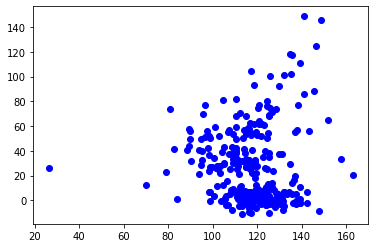

In [31]:
import matplotlib.pyplot as plt
plt.scatter(x=df['pelvic_radius'],y=df['degree_spondylolisthesis'],color='Blue')
x=df["pelvic_radius"]
y = df["degree_spondylolisthesis"]

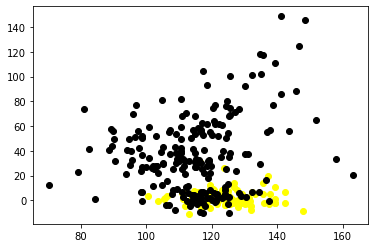

In [32]:
plt.scatter(x = df[df["class"] == "Normal"].pelvic_radius , y = df[df["class"] == "Normal"].degree_spondylolisthesis,color = "yellow")
plt.scatter(x = df[df["class"] == "Abnormal"].pelvic_radius , y = df[df["class"] == "Abnormal"].degree_spondylolisthesis,color = "black")

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


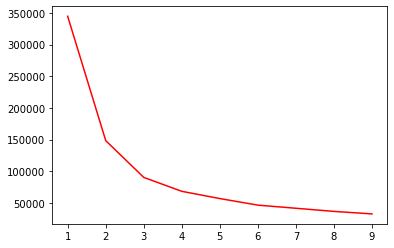

In [33]:
cluster_data_arg = {"x":x,"y":y}
cluster_data = pd.DataFrame(cluster_data_arg)
from sklearn.cluster import KMeans
wcss = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(cluster_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss,color="red")
plt.show()

In [34]:
kmeans2 = KMeans(n_clusters = 2)
clusters = kmeans2.fit_predict(cluster_data)
df["label"] = clusters

In [36]:
df2 = pd.read_csv("column_2C_weka.csv")
df2["class"] = [0 if each == "Abnormal" else 1 for each in df2["class"]]
data_ac_class = df2["class"]
predict_class = df["label"]
print("accuracy is : {}".format(100 - np.mean(np.abs(data_ac_class - predict_class)*100)))
kmeans_accuracy = int(100 - np.mean(np.abs(data_ac_class - predict_class)*100))

accuracy is : 62.25806451612903


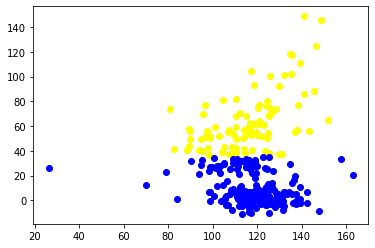

In [38]:
plt.scatter(x = df[df.label == 0].pelvic_radius,y = df[df.label == 0].degree_spondylolisthesis , color = "yellow")
plt.scatter(x = df[df.label == 1].pelvic_radius,y = df[df.label == 1].degree_spondylolisthesis , color = "blue")

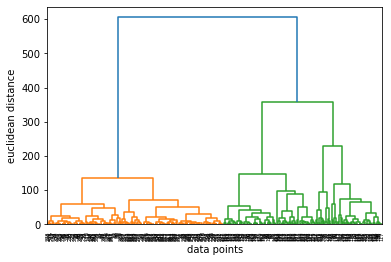

In [39]:
from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(cluster_data,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [41]:
from sklearn.cluster import AgglomerativeClustering
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 2,affinity= "euclidean",linkage = "ward")
cluster = hiyerartical_cluster.fit_predict(cluster_data)
df["label_hc"] = cluster

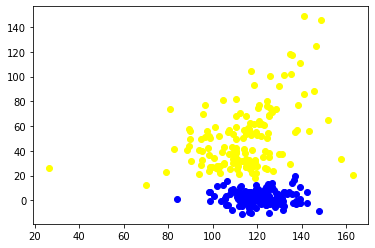

In [42]:
plt.scatter(x = df[df.label_hc == 0].pelvic_radius,y = df[df.label_hc == 0].degree_spondylolisthesis , color = "yellow")
plt.scatter(x = df[df.label_hc == 1].pelvic_radius,y = df[df.label_hc == 1].degree_spondylolisthesis , color = "blue")

In [43]:
print("accuracy is : {}".format(100 - np.mean(np.abs(data_ac_class - df["label_hc"])*100)))
hc_accuracy = int(100 - np.mean(np.abs(data_ac_class - df["label_hc"])*100))

accuracy is : 78.38709677419355


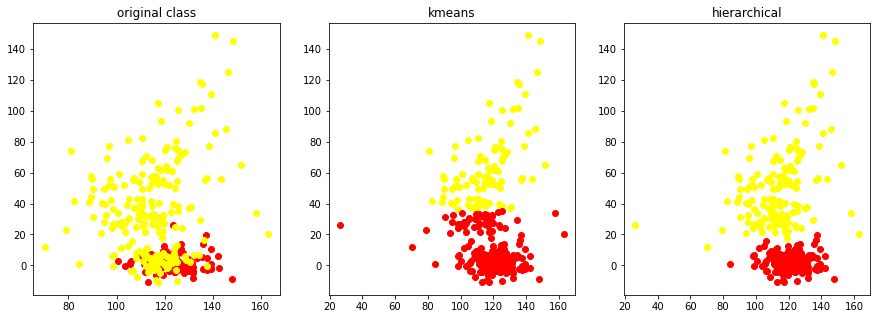

In [49]:
fig = plt.figure(figsize = (15,5))

plt.subplot(1, 3, 1)
plt.scatter(x = df[df["class"] == "Normal"].pelvic_radius , y = df[df["class"] == "Normal"].degree_spondylolisthesis,color = "red")
plt.scatter(x = df[df["class"] == "Abnormal"].pelvic_radius , y = df[df["class"] == "Abnormal"].degree_spondylolisthesis,color = "yellow")
plt.title("original class")

plt.subplot(1, 3, 2)
plt.scatter(x = df[df.label == 0].pelvic_radius,y = df[df.label == 0].degree_spondylolisthesis , color = "yellow")
plt.scatter(x = df[df.label == 1].pelvic_radius,y = df[df.label == 1].degree_spondylolisthesis , color = "red")
plt.title("kmeans") 

plt.subplot(1, 3, 3)
plt.scatter(x = df[df.label_hc == 0].pelvic_radius,y = df[df.label_hc == 0].degree_spondylolisthesis , color = "yellow")
plt.scatter(x = df[df.label_hc == 1].pelvic_radius,y = df[df.label_hc == 1].degree_spondylolisthesis , color = "red")
plt.title("hierarchical")

plt.show()

In [50]:
list1 = ["hc","kmeans"]
list2 = [hc_accuracy,kmeans_accuracy]
list3 = [100 - hc_accuracy,100 - kmeans_accuracy]
dictionary = {"name":list1,"value":list2,"hundred":list3}
dt = pd.DataFrame(dictionary)